<a href="https://colab.research.google.com/github/OgunSerifOnargan/VodoVest/blob/main/nba'18-'19ShootingStats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import io
import matplotlib.pyplot as plt
import sys
np.set_printoptions(threshold=sys.maxsize)

In [2]:
# Code to read csv file into colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

#2. Get the file
downloaded = drive.CreateFile({'id':'1O4fDJUJvFBp8zotCTVl5LuSE2WhKTdmO'}) # replace the id with id of file you want to access
downloaded.GetContentFile('nba_shotchartdetail_2018-19.csv')  
downloaded1 = drive.CreateFile({'id':'1ook14-47TIWiPtQHOMEWZ_dOuMdKlrsc'})
downloaded1.GetContentFile('f2287b7e8e691ed9e16e9c174578a363.jpg')
downloaded2 = drive.CreateFile({'id':'1qi390v26jt-OveW4Vq33X_OsSsBtcL1a'})  
downloaded2.GetContentFile('nba-logo-design.jpg')
#3. Read file as panda dataframe
import pandas as pd
df = pd.read_csv('nba_shotchartdetail_2018-19.csv') 

In [3]:
from matplotlib.patches import Circle, Rectangle, Arc
def draw_court(ax=None, color='white', lw=1, outer_lines=False):
    # If an axes object isn't provided to plot onto, just get current one
    if ax is None:
        ax = plt.gca()

    # Create the various parts of an NBA basketball court

    # Create the basketball hoop
    # Diameter of a hoop is 18" so it has a radius of 9", which is a value
    # 7.5 in our coordinate system
    hoop = Circle((0, -12.5), radius=7.5, linewidth=lw, color=color, fill=False, alpha=0.5)

    # Create backboard
    backboard = Rectangle((-30, -20.5), 60, 0, linewidth=lw, color=color)

    # The paint
    # Create the outer box 0f the paint, width=16ft, height=19ft
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color,
                          fill=False)
    # Create the inner box of the paint, widt=12ft, height=19ft
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color,
                          fill=False)

    # Create free throw top arc
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180,
                         linewidth=lw, color=color, fill=False)
    # Create free throw bottom arc
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0,
                            linewidth=lw, color=color, linestyle='dashed')
    # Restricted Zone, it is an arc with 4ft radius from center of the hoop
    restricted = Arc((0, -15), 80, 80, theta1=0, theta2=180, linewidth=lw,
                     color=color)
    
    # Three point line
    # Create the side 3pt lines, they are 14ft long before they begin to arc
    corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth=lw,
                               color=color)
    corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)
    # 3pt arc - center of arc will be the hoop, arc is 23'9" away from hoop
    # I just played around with the theta values until they lined up with the 
    # threes
    three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw,
                    color=color)

    # Center Court
    center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0,
                           linewidth=lw, color=color)
    center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0,
                           linewidth=lw, color=color)
   #Shooting Zones
   # restrictedArea = Arc((0, 0), 160, 160, theta1=0, theta2=360, linewidth=1,
   #                  color="black", linestyle="dashed")
   # zoneLine1 = Rectangle((20, 34.6), 500, -1, linewidth=1,
   #                            color="black", linestyle="dashed", angle=60)
   # zoneLine2 = Rectangle((-20, 34.6), 500, -1, linewidth=1,
   #                            color="black", linestyle="dashed", angle=120)
   # zone3ptLeft = Rectangle((220, 92.5), 30, -1, linewidth=1,
   #                            color="black", linestyle="dashed", angle=0)
   # zone3ptRight = Rectangle((-220, 92.5), 30, -1, linewidth=1,
   #                            color="black", linestyle="dashed", angle=180)
   # zone3ptNear = Arc((0, 0), 540, 540, theta1=22, theta2= 158, linewidth=1,
   #                  color="black", linestyle="dashed")
    # List of the court elements to be plotted onto the axes
    court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
                      bottom_free_throw, restricted, corner_three_a,
                      corner_three_b, three_arc, center_outer_arc,
                      center_inner_arc]

    if outer_lines:
        # Draw the half court line, baseline and side out bound lines
        outer_lines = Rectangle((-250, -47.5), 500, 470, linewidth=lw,
                                color=color, fill=False)
        court_elements.append(outer_lines)

    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)

    return ax

In [4]:
import matplotlib.cbook as cbook 
import matplotlib.image as image
pd.set_option('display.max_columns', None)

In [5]:
x=df["LOC_X"]
y=df["LOC_Y"]
df["Zones"] = 0
conditions = [
    ( (y<=92.5) & (x>=220) ),
    ( ( (x**2+y**2)>=25600 ) & ( x<220 ) & ( (x**2 + y**2)<=56406 ) & ( y<=1.73*x) ),
    ( ( (x**2+y**2)>56406 ) & (y>92.5) & ( (x**2+y**2)<= 72900 ) & ( y<=1.73*x ) ),
    ( ( (x**2+y**2)<25600 ) & ( y<=1.73*x ) & ( (x**2+y**2)>6400 ) ),
    ( (x**2+y**2)<=6400 ),
    ( ( (x**2+y**2)>=56406 ) & ( (x**2+y**2)<=72900 ) & ( y>1.73*x ) & ( y>=-1.73*x ) ),
    ( ( (x**2+y**2)<56406 ) & ( (x**2+y**2)>=25600 ) & ( y>1.73*x ) & ( y>=-1.73*x ) ),
    ( ( (x**2+y**2)>6400 ) & ( (x**2+y**2)<25600 ) & ( y>1.73*x ) & ( y>=-1.73*x ) ),
    ( ( (x**2+y**2)<=25600 ) & ( y<-1.73*x ) & ( (x**2+y**2)>6400 ) ),
    ( ( (x**2+y**2)>25600 ) & ( x>-220 ) & ( (x**2 + y**2)<=56406 ) & ( y<-1.73*x) ),
    ( (y <= 92.5) & (x<=-220) ),
    ( ( (x**2+y**2)>56406 ) & (y>92.5) & ( (x**2+y**2)<= 72900 ) & ( y<-1.73*x ) ),
    ( ( (x**2+y**2)>72900 ) & ( y<=1.73*x ) & (y< 425) ),
    ( ( (x**2+y**2)>72900 ) & ( y>1.73*x ) & (y>-1.73*x) & (y< 470) ),
    ( ( (x**2+y**2)>72900 ) & (y<=-1.73*x) & (y< 470) ),
    (y>=470)

]

values = ['3ptCornerLeft', "2ptMidLeft", "3ptMidLeft", "2ptLowLeft", "RestrictedArea",
          "3ptMidCentre", "2ptMidCentre", "2ptLowCentre", "2ptLowRight", "2ptMidRight",
          "3ptCornerRight", "3ptMidRight", "LongRangeLeft", "LongRangeMid", "LongRangeRight", "BackCourt"]

df['Zones'] = np.select(conditions, values)

df.Zones.value_counts()

RestrictedArea    91981
3ptMidCentre      24657
2ptLowCentre      13791
3ptMidRight       13058
3ptMidLeft        12128
2ptMidCentre       9610
3ptCornerRight     9243
3ptCornerLeft      8951
2ptLowLeft         7505
2ptLowRight        7402
LongRangeMid       6149
2ptMidRight        5305
2ptMidLeft         5228
LongRangeRight     2216
LongRangeLeft      1908
BackCourt           326
Name: Zones, dtype: int64

In [8]:
#Selecting 1st Match
x=df.LOC_X
y=df.LOC_Y
c=df.SHOT_MADE_FLAG
m=df.SHOT_ATTEMPTED_FLAG

#Converting shot type to numerical values and creating POINT_GAIN column
df.loc[df.SHOT_TYPE == "3PT Field Goal", "SHOT_TYPE"] = 3
df.loc[df.SHOT_TYPE == "2PT Field Goal", "SHOT_TYPE"] = 2
df["POINT_GAIN"] = df.SHOT_TYPE * df.SHOT_MADE_FLAG
g=df.POINT_GAIN

#Bining the data
  #count of trial which seperated by hexes
attemptedHex = plt.hexbin(x, y, m, reduce_C_function=np.sum,
           gridsize=(45,50), cmap='Blues')
print(len(attemptedHex.get_array()))
  #average point gain in hexes
pointGainHex = plt.hexbin(x, y, C=g, 
           gridsize=(45,50), cmap='Blues')
print(len(pointGainHex.get_array()))
  #probabilty of making points in hexes
madeRatioHex = plt.hexbin(x, y, C=c, 
           gridsize=(45,50), cmap='Blues')
print(len(madeRatioHex.get_array()))
plt.close()

#calculation for frequency of shot attempts in total # of shots
attemptedHexArray = attemptedHex.get_array()
s=sum(attemptedHexArray)
shot_freq=attemptedHexArray / s
max_freq = max(shot_freq)

#low Point Gain filter
attemptedHexArray = attemptedHex.get_array()
pointGainHexArray = pointGainHex.get_array()
madeRatioHexArray = madeRatioHex.get_array()

filter_threshold = 0
for i in range(len(attemptedHexArray)):
    if pointGainHexArray[i] < filter_threshold:
        pointGainHexArray[i] = np.NaN
        madeRatioHexArray[i] = np.nan
        attemptedHexArray[i] = np.nan
x = [i[0] for i in attemptedHex.get_offsets()]
y = [i[1] for i in attemptedHex.get_offsets()]

#low Freq Filter
filter_threshold = 0.0005
for i in range(len(attemptedHexArray)):
    if shot_freq[i] < filter_threshold:
        pointGainHexArray[i] = np.nan
        madeRatioHexArray[i] = np.nan
        attemptedHexArray[i] = np.nan
x = [i[0] for i in attemptedHex.get_offsets()]
y = [i[1] for i in attemptedHex.get_offsets()]

#normalization of freq
sizes = shot_freq
sizes = shot_freq / max(sizes) * 150

#shot freq for label1
sizes = shot_freq * 100
sizes = sizes / max(sizes) * 40
max_freq = max(shot_freq)

2223
2223
2223


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

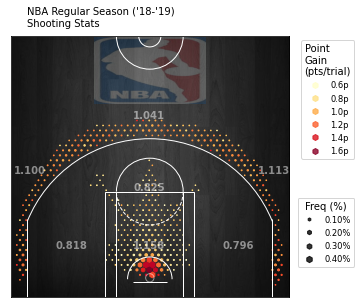

In [15]:
plt.figure(figsize=(5, 4.7))
plt.xlim(250, -250)
plt.ylim(-47.5, 422.5)
img = plt.imread("f2287b7e8e691ed9e16e9c174578a363.jpg")
plt.imshow(img, extent=[250,-250,-47.5,500])

img = plt.imread("nba-logo-design.jpg")
plt.imshow(img, extent=[100, -100,300,420], alpha=0.2)
draw_court(outer_lines=True)
scatter = plt.scatter(x, y, c=pointGainHexArray, s=sizes, cmap='YlOrRd', 
                      marker='h', edgecolors="face")

plt.text(220, 440, "NBA Regular Season ('18-'19)\nShooting Stats")
plt.text(30, 40, "1.158", color="white", weight="bold", alpha=0.5)
plt.text(170, 40, "0.818", color="white", weight="bold", alpha=0.5)
plt.text(-130, 40, "0.796", color="white", weight="bold", alpha=0.5)
plt.text(30, 145, "0.825", color="white", weight="bold", alpha=0.5)
plt.text(30, 275, "1.041", color="white", weight="bold", alpha=0.5)
plt.text(245, 175, "1.100", color="white", weight="bold", alpha=0.5)
plt.text(-195, 175, "1.113", color="white", weight="bold", alpha=0.5)
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_visible(False)
cur_axes.axes.get_yaxis().set_visible(False)

legend1 = plt.legend(
    *scatter.legend_elements(
        "colors", num=6, alpha=0.8, fmt="{x:.1f}p",
        func=lambda c: c
        ),
    loc="upper right", bbox_to_anchor = (1.25, 1), 
    title='Point\nGain\n(pts/trial)', fontsize='small')

legend2 = plt.legend(
    *scatter.legend_elements(
        'sizes', num=4, alpha=0.8, fmt="{x:.2f}%"
        , func=lambda s: s/100
    ),
    loc='lower right', bbox_to_anchor = (1.25, 0.1), title='Freq (%)', fontsize='small', columnspacing=0.5)
plt.gca().add_artist(legend1)

plt.tight_layout() 
from google.colab import files
plt.savefig("nbaRegularSeason('18-'19')ShootingStats.png", dpi=1200)
files.download("nbaRegularSeason('18-'19')ShootingStats.png") 